# Machine Learning Algorithms Testing

In [93]:
import os
import pandas as pd
from os import path
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#LR libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#KNN libraries
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#RF libraries
# source - https://www.datacamp.com/tutorial/random-forests-classifier-python
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier

#SVM libraries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# DT
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Ensemble
from mlxtend.classifier import StackingClassifier

In [94]:
path = os.getcwd()
text_features = pd.read_csv(path + "/book.csv")
text_features_header = list(text_features.columns)

text_features

,Unnamed: 0,Book Title,Word Count,Sentence Count,AVG Word Length,AVG Sentence Length,Total Syllables,MONOSYLL,POLYSYLL,NTR,VTR,TTR,Root TTR,Corrected TTR,BiLog TTR,LD,FWTR,MIN,MAX
0,0,Aginaldo,479,49,5.062630,9.775510,937,165,311,0.228013,0.086319,0.017915,0.443924,0.313902,0.373504,0.412052,0.052117,3,10
1,1,Alamat ng Lansones,512,52,5.154297,9.846154,1104,158,354,0.159322,0.161017,0.016949,0.411693,0.291111,0.360900,0.396610,0.030508,8,16
2,2,Andres Bonifacio - 1,610,21,5.860656,29.047619,1521,212,401,0.207207,0.120120,0.015015,0.387492,0.273998,0.354174,0.388889,0.054054,6,10
3,3,Ang Aklatang Pusa,958,72,5.385177,13.319444,2096,297,653,0.211796,0.112601,0.009830,0.328835,0.232521,0.341571,0.401251,0.020554,8,12
4,4,Ang Anghel ng Santa Ana,920,85,5.240217,10.905882,2018,320,606,0.172350,0.105069,0.010138,0.333947,0.236136,0.343079,0.413825,0.022120,8,12
5,5,Ang Ating mga Ninuno - 1,503,49,5.017893,10.265306,1073,164,339,0.219512,0.099303,0.019164,0.459131,0.324655,0.377465,0.395470,0.003484,6,10
6,6,Ang Ating mga Ninuno - 2,2054,130,5.014606,15.800000,4381,724,1329,0.218111,0.101001,0.004789,0.229516,0.162292,0.309831,0.400522,0.009142,11,16
7,7,Ang Batang Maraming Bawal,881,61,5.005675,14.557377,1843,330,556,0.136493,0.104265,0.010427,0.338662,0.239470,0.344461,0.366825,0.035071,6,12
8,8,Ang Biyoletang Tren_ Maglakbay sa Kaharian ng ...,142,14,5.619718,10.142857,280,72,70,0.324074,0.134259,0.037037,0.544331,0.384900,0.386853,0.486111,0.037037,3,10
9,9,Ang Dyip ni Mang Tomas,1260,89,5.112698,14.258427,2596,510,758,0.191316,0.099729,0.007463,0.286513,0.202595,0.328671,0.403664,0.015604,8,16


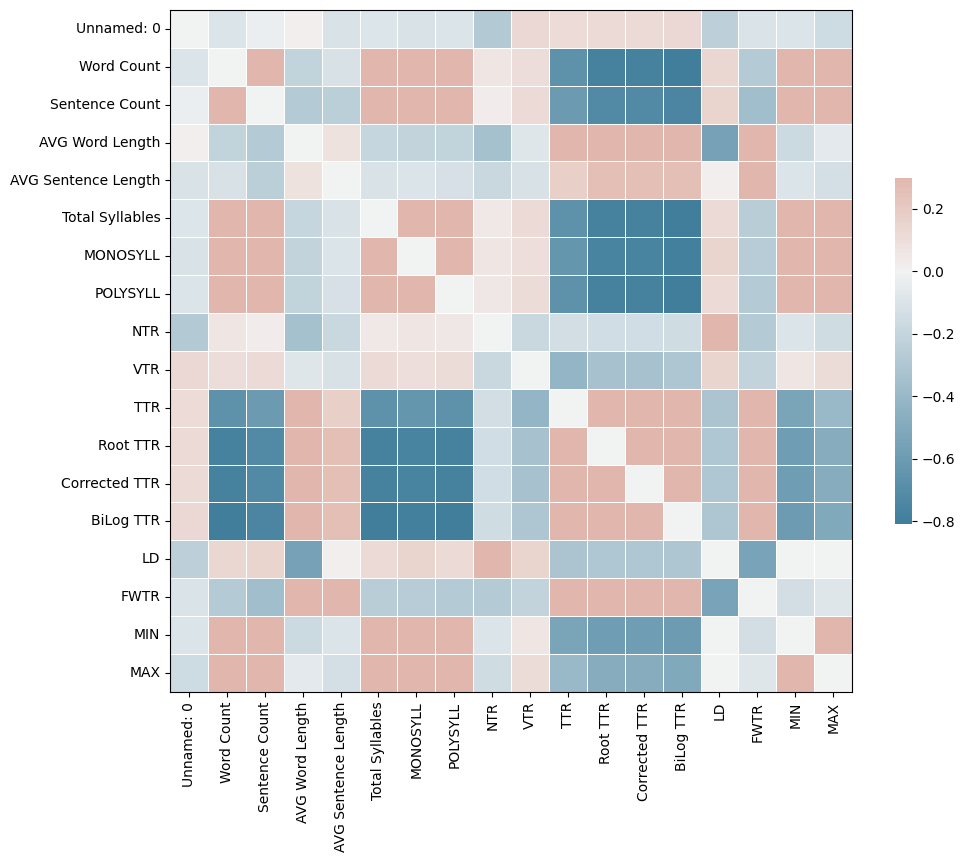

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

text_features = text_features.drop(columns=['Book Title'])

corr = text_features.corr()

np.fill_diagonal(corr.values, 0)

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.show()

In [96]:
X = text_features.drop(columns=['MIN', 'MAX'])
y = text_features[['MIN', 'MAX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [97]:
logreg = LogisticRegression(max_iter=1000, penalty='l2')
multi_logreg = MultiOutputClassifier(logreg)
multi_logreg.fit(X_train_scaled, y_train)

lr_pred = multi_logreg.predict(X_test_scaled)
print("Predictions: ", lr_pred)

book_titles = X_test.index

for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {lr_pred[i]}')

accuracy = accuracy_score(y_test.values.ravel(), lr_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), lr_pred.ravel())
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  [[ 6 10]
 [ 8 16]
 [ 6 10]
 [ 6 10]
 [ 6 10]
 [ 6 10]
 [ 6 16]
 [ 3 10]
 [ 3 10]
 [11 16]
 [ 3 10]]
Book Title: 28, Predicted Age Range: [ 6 10]
Book Title: 4, Predicted Age Range: [ 8 16]
Book Title: 30, Predicted Age Range: [ 6 10]
Book Title: 50, Predicted Age Range: [ 6 10]
Book Title: 0, Predicted Age Range: [ 6 10]
Book Title: 14, Predicted Age Range: [ 6 10]
Book Title: 39, Predicted Age Range: [ 6 16]
Book Title: 46, Predicted Age Range: [ 3 10]
Book Title: 27, Predicted Age Range: [ 3 10]
Book Title: 6, Predicted Age Range: [11 16]
Book Title: 23, Predicted Age Range: [ 3 10]
Accuracy: 0.7272727272727273
Confusion Matrix:
[[1 1 0 0 0 0 0]
 [1 5 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 7 0 0 1]
 [1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 1]]


### K-Nearest Neighbors

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)

multi_output_knn = MultiOutputClassifier(knn)
multi_output_knn.fit(X_train_scaled, y_train)

knn_pred = multi_output_knn.predict(X_test_scaled)
book_titles = X_test.index

# book index
for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {knn_pred[i]}')
print("Predictions: ", knn_pred)

accuracy = accuracy_score(y_test.values.ravel(), knn_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), knn_pred.ravel())
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

# knn_pred = knn.predict(X_test_scaled)
# print("Predictions: ", knn_pred)

# accuracy = accuracy_score(y_test, knn_pred)
# conf_matrix = confusion_matrix(y_test, knn_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')

Book Title: 28, Predicted Age Range: [ 6 10]
Book Title: 4, Predicted Age Range: [ 6 10]
Book Title: 30, Predicted Age Range: [ 6 10]
Book Title: 50, Predicted Age Range: [ 6 10]
Book Title: 0, Predicted Age Range: [ 6 10]
Book Title: 14, Predicted Age Range: [ 6 10]
Book Title: 39, Predicted Age Range: [ 6 10]
Book Title: 46, Predicted Age Range: [ 3 10]
Book Title: 27, Predicted Age Range: [ 3 10]
Book Title: 6, Predicted Age Range: [ 8 16]
Book Title: 23, Predicted Age Range: [ 3 10]
Predictions:  [[ 6 10]
 [ 6 10]
 [ 6 10]
 [ 6 10]
 [ 6 10]
 [ 6 10]
 [ 6 10]
 [ 3 10]
 [ 3 10]
 [ 8 16]
 [ 3 10]]
Accuracy: 0.6818181818181818
Confusion Matrix:
[[1 1 0 0 0 0 0]
 [1 5 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 8 0 0 0]
 [1 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1]]


### Random Forest

In [99]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_output_rf = MultiOutputClassifier(rf)
multi_output_rf.fit(X_train_scaled, y_train)

rf_pred = multi_output_rf.predict(X_test_scaled)
book_titles = X_test.index

# book index
for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {rf_pred[i]}')
print("Predictions: ", rf_pred)

accuracy = accuracy_score(y_test.values.ravel(), rf_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), rf_pred.ravel())
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Book Title: 28, Predicted Age Range: [ 6 10]
Book Title: 4, Predicted Age Range: [ 8 12]
Book Title: 30, Predicted Age Range: [ 6 10]
Book Title: 50, Predicted Age Range: [ 6 10]
Book Title: 0, Predicted Age Range: [ 3 10]
Book Title: 14, Predicted Age Range: [ 6 10]
Book Title: 39, Predicted Age Range: [ 6 10]
Book Title: 46, Predicted Age Range: [ 6 10]
Book Title: 27, Predicted Age Range: [3 8]
Book Title: 6, Predicted Age Range: [11 16]
Book Title: 23, Predicted Age Range: [ 3 10]
Predictions:  [[ 6 10]
 [ 8 12]
 [ 6 10]
 [ 6 10]
 [ 3 10]
 [ 6 10]
 [ 6 10]
 [ 6 10]
 [ 3  8]
 [11 16]
 [ 3 10]]
Accuracy: 0.8181818181818182
Confusion Matrix:
[[2 0 0 0 0 0 0]
 [1 5 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 7 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 1]]


### Support Vector Machine

In [100]:
clf_svm = svm.SVC(kernel='linear')
multi_svm = MultiOutputClassifier(clf_svm)
multi_svm.fit(X_train_scaled, y_train)

svm_pred = multi_svm.predict(X_test_scaled)

book_titles = X_test.index

# book index
for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {svm_pred[i]}')
print("Predictions: ", svm_pred)

accuracy = accuracy_score(y_test.values.ravel(), svm_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), svm_pred.ravel())
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Book Title: 28, Predicted Age Range: [ 6 10]
Book Title: 4, Predicted Age Range: [ 8 16]
Book Title: 30, Predicted Age Range: [ 6 10]
Book Title: 50, Predicted Age Range: [ 3 10]
Book Title: 0, Predicted Age Range: [ 6 10]
Book Title: 14, Predicted Age Range: [ 6 10]
Book Title: 39, Predicted Age Range: [ 6 10]
Book Title: 46, Predicted Age Range: [ 3 10]
Book Title: 27, Predicted Age Range: [ 3 10]
Book Title: 6, Predicted Age Range: [11 16]
Book Title: 23, Predicted Age Range: [ 3 10]
Predictions:  [[ 6 10]
 [ 8 16]
 [ 6 10]
 [ 3 10]
 [ 6 10]
 [ 6 10]
 [ 6 10]
 [ 3 10]
 [ 3 10]
 [11 16]
 [ 3 10]]
Accuracy: 0.7272727272727273
Confusion Matrix:
[[1 1 0 0 0 0 0]
 [2 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 8 0 0 0]
 [1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 1]]


### Decision Trees

In [101]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=33)

multi_output_dt = MultiOutputClassifier(dt)
multi_output_dt.fit(X_train_scaled, y_train)

dt_pred = multi_output_dt.predict(X_test_scaled)
book_titles = X_test.index

# book index
for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {dt_pred[i]}')
print("Predictions: ", dt_pred)

accuracy = accuracy_score(y_test.values.ravel(), dt_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), dt_pred.ravel())
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Book Title: 28, Predicted Age Range: [ 6 10]
Book Title: 4, Predicted Age Range: [ 8 12]
Book Title: 30, Predicted Age Range: [ 6 10]
Book Title: 50, Predicted Age Range: [ 6 10]
Book Title: 0, Predicted Age Range: [ 6 12]
Book Title: 14, Predicted Age Range: [ 6 10]
Book Title: 39, Predicted Age Range: [ 6 10]
Book Title: 46, Predicted Age Range: [ 3 10]
Book Title: 27, Predicted Age Range: [ 8 10]
Book Title: 6, Predicted Age Range: [ 8 16]
Book Title: 23, Predicted Age Range: [ 6 10]
Predictions:  [[ 6 10]
 [ 8 12]
 [ 6 10]
 [ 6 10]
 [ 6 12]
 [ 6 10]
 [ 6 10]
 [ 3 10]
 [ 8 10]
 [ 8 16]
 [ 6 10]]
Accuracy: 0.7272727272727273
Confusion Matrix:
[[0 1 1 0 0 0 0]
 [0 6 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 7 0 1 0]
 [1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 1]]


## Ensemble Methods

Create meta-model

In [102]:
# used Stacking based on this source: https://www.geeksforgeeks.org/stacking-in-machine-learning-2/
# meta-model used: Linear Regression

meta_model = LogisticRegression()

#### LR + SVM

In [103]:
lr_svm_stack = StackingClassifier(classifiers =[logreg, clf_svm], meta_classifier = meta_model)

model_stack = lr_svm_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

ValueError: y should be a 1d array, got an array of shape (43, 2) instead.

#### LR + KNN

In [ ]:
lr_knn_stack = StackingClassifier(classifiers =[logreg, knn], meta_classifier = meta_model)

model_stack = lr_knn_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

ValueError: y should be a 1d array, got an array of shape (16, 2) instead.

#### LR + RF

In [ ]:
lr_rf_stack = StackingClassifier(classifiers =[logreg, rf], meta_classifier = meta_model)

model_stack = lr_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  [ 9 12]
Accuracy: 0.5
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 1]]


#### SVM + KNN

In [ ]:
svm_knn_stack = StackingClassifier(classifiers =[clf_svm, knn], meta_classifier = meta_model)

model_stack = svm_knn_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  [ 9 12]
Accuracy: 0.5
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 1]]


#### SVM + RF

In [ ]:
svm_rf_stack = StackingClassifier(classifiers =[clf_svm, rf], meta_classifier = meta_model)

model_stack = svm_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  [ 9 12]
Accuracy: 0.5
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 1]]


#### KNN + RF

In [ ]:
knn_rf_stack = StackingClassifier(classifiers =[knn, rf], meta_classifier = meta_model)

model_stack = knn_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')